# Classification on a given dataset


In this notebook, we will perform classification on a given dataset.

## Import the modules

Let's start by importing the necessary packages.

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.metrics import accuracy_score, r2_score

from sklearn.model_selection import cross_validate, train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

# Import the data

In [3]:
X_train = np.load(os.path.join("data", "X_train.npy"))
X_test = np.load(os.path.join("data", "X_test.npy"))
y_train = np.load(os.path.join("data", "y_train.npy"))
y_test = np.load(os.path.join("data", "y_test.npy"))

## Use model

"For this problem, we will compare different models and provide a description of each model's characteristics and capabilities."

1. Decision Tree:
   - Decision Tree is a supervised learning algorithm used for classification and regression tasks.
   - It builds a tree-like model where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents an outcome or prediction.
   - The DecisionTreeClassifier is a specific implementation of the decision tree algorithm for classification tasks.

2. SGD (Stochastic Gradient Descent):
   - SGD is an optimization algorithm commonly used for training linear classifiers or regressors.
   - It iteratively updates the model parameters by minimizing the loss function with a small subset of training data in each iteration.
   - The SGDClassifier is an implementation of the SGD algorithm for classification tasks.

3. Random Forest:
   - Random Forest is an ensemble learning method that combines multiple decision trees to make predictions.
   - It creates a set of decision trees and aggregates their predictions to obtain the final prediction.
   - The RandomForestClassifier is an implementation of the random forest algorithm for classification tasks.

4. Perceptron:
   - Perceptron is a binary classification algorithm used for linearly separable data.
   - It learns a linear decision boundary by iteratively updating the model parameters based on the misclassified instances.
   - The Perceptron is a simple linear classifier.

5. LinearSVC (Linear Support Vector Classifier):
   - LinearSVC is a linear classification algorithm based on Support Vector Machines (SVM).
   - It finds the best hyperplane that separates the data into different classes with the largest margin.
   - The LinearSVC is specifically designed for linearly separable data.

6. Logistic Regression:
   - Logistic Regression is a widely used statistical model for binary classification.
   - It estimates the probability of a binary outcome based on the input features by applying the logistic function.
   - The LogisticRegression model uses the logistic regression algorithm for classification tasks.

7. SVC (Support Vector Classifier):
   - SVC is a non-linear classification algorithm based on Support Vector Machines (SVM).
   - It maps the input data to a high-dimensional feature space and finds the best hyperplane to separate the classes.
   - The SVC is a versatile classifier capable of handling non-linear decision boundaries.

Each of these models has its own characteristics, strengths, and suitable use cases. The choice of model depends on the nature of the data and the specific problem you are trying to solve.

In [4]:
models = {
    "DecisionTree": DecisionTreeClassifier(),
    "SGD": SGDClassifier(),
    "RandomForest": RandomForestClassifier(),
    "Perceptron": Perceptron(),
    "LinearSVC": LinearSVC(C=1),
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC(),
}

final_scores = {}

The test_classifier function evaluates a classifier model by fitting it to the training data, performing cross-validation on the testing data, and then printing the accuracy score and standard deviation of the model's performance. The function also updates a dictionary called final_scores with the model's mean accuracy score.

In [5]:
def test_classificator(classifier: tuple) -> None:
    """
    Tests a classifier model and prints the evaluation scores.

    Args:
        classifier (tuple): A tuple containing the model name as the first element and the classifier object as the second element.

    Returns:
        None
    """
    print("Starting", classifier[0])
    classifier[1].fit(X_train, y_train)
    scores = cross_val_score(classifier[1], X_test, y_test, cv=10, scoring="accuracy")
    mean_score = scores.mean()
    print(
        "we got a",
        "{:.2f}".format(mean_score),
        "accuracy with a standard deviation of",
        "{:.2f}".format(scores.std()),
    )
    print(classifier[0], "score :", mean_score)
    final_scores[classifier[0]] = mean_score
    print()

## Evaluate each model

Starting DecisionTree
we got a 0.72 accuracy with a standard deviation of 0.04
DecisionTree score : 0.718

Starting SGD
we got a 0.79 accuracy with a standard deviation of 0.07
SGD score : 0.786

Starting RandomForest
we got a 0.83 accuracy with a standard deviation of 0.06
RandomForest score : 0.8299999999999998

Starting Perceptron
we got a 0.83 accuracy with a standard deviation of 0.07
Perceptron score : 0.826

Starting LinearSVC


/home/nicolas/.cache/pypoetry/virtualenvs/ftml-3N6BF953-py3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/nicolas/.cache/pypoetry/virtualenvs/ftml-3N6BF953-py3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/nicolas/.cache/pypoetry/virtualenvs/ftml-3N6BF953-py3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/nicolas/.cache/pypoetry/virtualenvs/ftml-3N6BF953-py3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/nicolas/.cache/pypoetry/virtualenvs/ftml-3N6BF953-py3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:124

we got a 0.86 accuracy with a standard deviation of 0.06
LinearSVC score : 0.8640000000000001

Starting LogisticRegression
we got a 0.85 accuracy with a standard deviation of 0.06
LogisticRegression score : 0.852

Starting SVC
we got a 0.86 accuracy with a standard deviation of 0.06
SVC score : 0.8640000000000001

DecisionTree score : 0.718
SGD score : 0.786
RandomForest score : 0.8299999999999998
Perceptron score : 0.826
LinearSVC score : 0.8640000000000001
LogisticRegression score : 0.852
SVC score : 0.8640000000000001


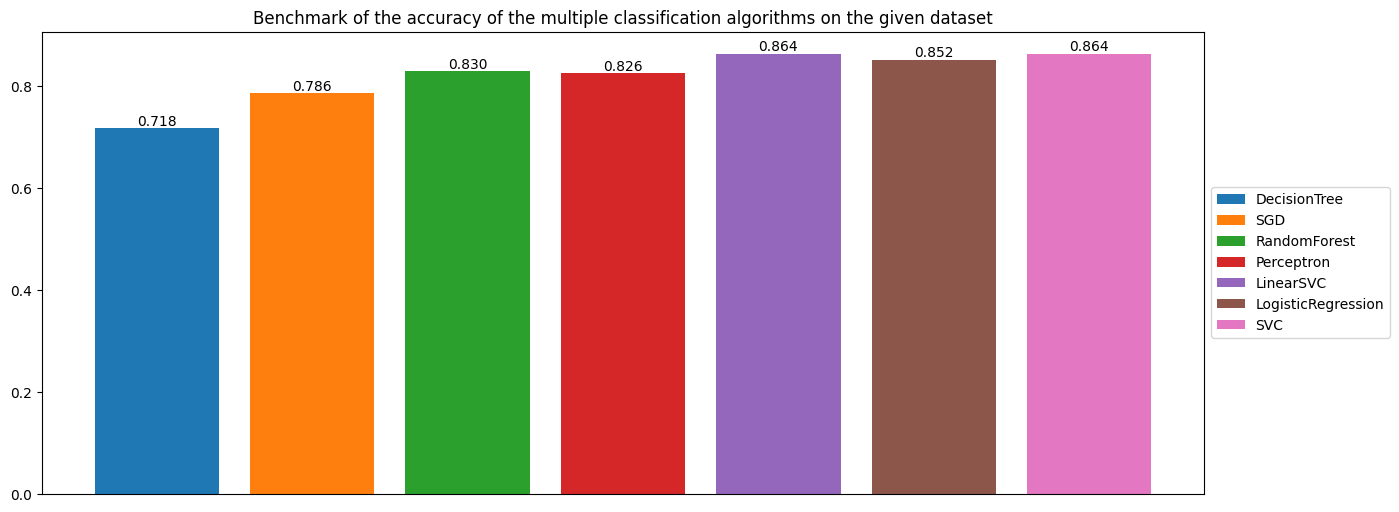

In [6]:
for key, value in models.items():
    test_classificator((key, value))
plt.figure(figsize=(15, 6))
plt.xticks([])
for i, classifier in enumerate(final_scores.items()):
    print(f"{classifier[0]} score : {classifier[1]}")
    plt.bar(i, classifier[1], label=classifier[0])
    plt.text(i, classifier[1], "{:.3f}".format(classifier[1]), ha="center", va="bottom")

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title(
    "Benchmark of the accuracy of the multiple classification algorithms on the given dataset"
)

plt.show()